In [372]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import statistics
import sklearn
import statsmodels.api as sm
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score
from pandas import DataFrame
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [373]:
df = pd.read_csv(r'C:\Users\Administrator\OneDrive\MSDA\Predictive modeling 208\Medical\medical_clean.csv')

In [374]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 50 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   CaseOrder           10000 non-null  int64  
 1   Customer_id         10000 non-null  object 
 2   Interaction         10000 non-null  object 
 3   UID                 10000 non-null  object 
 4   City                10000 non-null  object 
 5   State               10000 non-null  object 
 6   County              10000 non-null  object 
 7   Zip                 10000 non-null  int64  
 8   Lat                 10000 non-null  float64
 9   Lng                 10000 non-null  float64
 10  Population          10000 non-null  int64  
 11  Area                10000 non-null  object 
 12  TimeZone            10000 non-null  object 
 13  Job                 10000 non-null  object 
 14  Children            10000 non-null  int64  
 15  Age                 10000 non-null  int64  
 16  Incom

In [375]:
df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
9995    False
9996    False
9997    False
9998    False
9999    False
Length: 10000, dtype: bool

In [376]:
df.isnull().sum()

CaseOrder             0
Customer_id           0
Interaction           0
UID                   0
City                  0
State                 0
County                0
Zip                   0
Lat                   0
Lng                   0
Population            0
Area                  0
TimeZone              0
Job                   0
Children              0
Age                   0
Income                0
Marital               0
Gender                0
ReAdmis               0
VitD_levels           0
Doc_visits            0
Full_meals_eaten      0
vitD_supp             0
Soft_drink            0
Initial_admin         0
HighBlood             0
Stroke                0
Complication_risk     0
Overweight            0
Arthritis             0
Diabetes              0
Hyperlipidemia        0
BackPain              0
Anxiety               0
Allergic_rhinitis     0
Reflux_esophagitis    0
Asthma                0
Services              0
Initial_days          0
TotalCharge           0
Additional_charg

In [377]:
pd.set_option('display.max_columns', None)
df.head(5)

,CaseOrder,Customer_id,Interaction,UID,City,State,County,Zip,Lat,Lng,Population,Area,TimeZone,Job,Children,Age,Income,Marital,Gender,ReAdmis,VitD_levels,Doc_visits,Full_meals_eaten,vitD_supp,Soft_drink,Initial_admin,HighBlood,Stroke,Complication_risk,Overweight,Arthritis,Diabetes,Hyperlipidemia,BackPain,Anxiety,Allergic_rhinitis,Reflux_esophagitis,Asthma,Services,Initial_days,TotalCharge,Additional_charges,Item1,Item2,Item3,Item4,Item5,Item6,Item7,Item8
0,1,C412403,8cd49b13-f45a-4b47-a2bd-173ffa932c2f,3a83ddb66e2ae73798bdf1d705dc0932,Eva,AL,Morgan,35621,34.34960,-86.72508,2951,Suburban,America/Chicago,"Psychologist, sport and exercise",1,53,86575.93,Divorced,Male,No,19.141466,6,0,0,No,Emergency Admission,Yes,No,Medium,No,Yes,Yes,No,Yes,Yes,Yes,No,Yes,Blood Work,10.585770,3726.702860,17939.403420,3,3,2,2,4,3,3,4
1,2,Z919181,d2450b70-0337-4406-bdbb-bc1037f1734c,176354c5eef714957d486009feabf195,Marianna,FL,Jackson,32446,30.84513,-85.22907,11303,Urban,America/Chicago,Community development worker,3,51,46805.99,Married,Female,No,18.940352,4,2,1,No,Emergency Admission,Yes,No,High,Yes,No,No,No,No,No,No,Yes,No,Intravenous,15.129562,4193.190458,17612.998120,3,4,3,4,4,4,3,3
2,3,F995323,a2057123-abf5-4a2c-abad-8ffe33512562,e19a0fa00aeda885b8a436757e889bc9,Sioux Falls,SD,Minnehaha,57110,43.54321,-96.63772,17125,Suburban,America/Chicago,Chief Executive Officer,3,53,14370.14,Widowed,Female,No,18.057507,4,1,0,No,Elective Admission,Yes,No,Medium,Yes,No,Yes,No,No,No,No,No,No,Blood Work,4.772177,2434.234222,17505.192460,2,4,4,4,3,4,3,3
3,4,A879973,1dec528d-eb34-4079-adce-0d7a40e82205,cd17d7b6d152cb6f23957346d11c3f07,New Richland,MN,Waseca,56072,43.89744,-93.51479,2162,Suburban,America/Chicago,Early years teacher,0,78,39741.49,Married,Male,No,16.576858,4,1,0,No,Elective Admission,No,Yes,Medium,No,Yes,No,No,No,No,No,Yes,Yes,Blood Work,1.714879,2127.830423,12993.437350,3,5,5,3,4,5,5,5
4,5,C544523,5885f56b-d6da-43a3-8760-83583af94266,d2f0425877b10ed6bb381f3e2579424a,West Point,VA,King William,23181,37.59894,-76.88958,5287,Rural,America/New_York,Health promotion specialist,1,22,1209.56,Widowed,Female,No,17.439069,5,0,2,Yes,Elective Admission,No,No,Low,No,No,No,Yes,No,No,Yes,No,No,CT Scan,1.254807,2113.073274,3716.525786,2,1,3,3,5,3,4,3


In [378]:
df_new = df.drop(['CaseOrder','Customer_id','Interaction','UID','City','State','Marital','County','Zip','Lat','Lng','Population','Area','TimeZone','Job','Item1','Item2','Item3','Item4','Item5','Item6','Item7','Item8'], axis = 1)

In [379]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 27 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Children            10000 non-null  int64  
 1   Age                 10000 non-null  int64  
 2   Income              10000 non-null  float64
 3   Gender              10000 non-null  object 
 4   ReAdmis             10000 non-null  object 
 5   VitD_levels         10000 non-null  float64
 6   Doc_visits          10000 non-null  int64  
 7   Full_meals_eaten    10000 non-null  int64  
 8   vitD_supp           10000 non-null  int64  
 9   Soft_drink          10000 non-null  object 
 10  Initial_admin       10000 non-null  object 
 11  HighBlood           10000 non-null  object 
 12  Stroke              10000 non-null  object 
 13  Complication_risk   10000 non-null  object 
 14  Overweight          10000 non-null  object 
 15  Arthritis           10000 non-null  object 
 16  Diabe

In [380]:
df_new.head()

,Children,Age,Income,Gender,ReAdmis,VitD_levels,Doc_visits,Full_meals_eaten,vitD_supp,Soft_drink,Initial_admin,HighBlood,Stroke,Complication_risk,Overweight,Arthritis,Diabetes,Hyperlipidemia,BackPain,Anxiety,Allergic_rhinitis,Reflux_esophagitis,Asthma,Services,Initial_days,TotalCharge,Additional_charges
0,1,53,86575.93,Male,No,19.141466,6,0,0,No,Emergency Admission,Yes,No,Medium,No,Yes,Yes,No,Yes,Yes,Yes,No,Yes,Blood Work,10.585770,3726.702860,17939.403420
1,3,51,46805.99,Female,No,18.940352,4,2,1,No,Emergency Admission,Yes,No,High,Yes,No,No,No,No,No,No,Yes,No,Intravenous,15.129562,4193.190458,17612.998120
2,3,53,14370.14,Female,No,18.057507,4,1,0,No,Elective Admission,Yes,No,Medium,Yes,No,Yes,No,No,No,No,No,No,Blood Work,4.772177,2434.234222,17505.192460
3,0,78,39741.49,Male,No,16.576858,4,1,0,No,Elective Admission,No,Yes,Medium,No,Yes,No,No,No,No,No,Yes,Yes,Blood Work,1.714879,2127.830423,12993.437350
4,1,22,1209.56,Female,No,17.439069,5,0,2,Yes,Elective Admission,No,No,Low,No,No,No,Yes,No,No,Yes,No,No,CT Scan,1.254807,2113.073274,3716.525786


In [381]:
df_new[['Gender','Soft_drink','HighBlood','Stroke','Overweight','Arthritis','Diabetes','Hyperlipidemia','BackPain','Anxiety','Allergic_rhinitis','Reflux_esophagitis','Asthma']].describe()

,Gender,Soft_drink,HighBlood,Stroke,Overweight,Arthritis,Diabetes,Hyperlipidemia,BackPain,Anxiety,Allergic_rhinitis,Reflux_esophagitis,Asthma
count,10000,10000,10000,10000,10000,10000,10000,10000,10000,10000,10000,10000,10000
unique,3,2,2,2,2,2,2,2,2,2,2,2,2
top,Female,No,No,No,Yes,No,No,No,No,No,No,No,No
freq,5018,7425,5910,8007,7094,6426,7262,6628,5886,6785,6059,5865,7107


In [382]:
df_new = df_new.replace(to_replace={'Yes':1, 'No':0})

In [383]:
df_new['Gender_sub'] = df_new['Gender'].replace(('Male','Female','Nonbinary'),(0,1,2))
df_new['Complication_risk_sub'] = df_new['Complication_risk'].replace(('Low','Medium','High'),(0,1,2))

In [384]:
Initial_admin_dummy = pd.get_dummies(df_new['Initial_admin'], drop_first=True)
Services_dummy = pd.get_dummies(df_new['Services'], drop_first=True)
df_new = pd.concat([df_new,Initial_admin_dummy,Services_dummy], axis = 1)

In [385]:
df_new = df_new.drop(['Gender','Complication_risk','Initial_admin','Services'], axis=1)

In [386]:
df_new.head()

,Children,Age,Income,ReAdmis,VitD_levels,Doc_visits,Full_meals_eaten,vitD_supp,Soft_drink,HighBlood,Stroke,Overweight,Arthritis,Diabetes,Hyperlipidemia,BackPain,Anxiety,Allergic_rhinitis,Reflux_esophagitis,Asthma,Initial_days,TotalCharge,Additional_charges,Gender_sub,Complication_risk_sub,Emergency Admission,Observation Admission,CT Scan,Intravenous,MRI
0,1,53,86575.93,0,19.141466,6,0,0,0,1,0,0,1,1,0,1,1,1,0,1,10.585770,3726.702860,17939.403420,0,1,1,0,0,0,0
1,3,51,46805.99,0,18.940352,4,2,1,0,1,0,1,0,0,0,0,0,0,1,0,15.129562,4193.190458,17612.998120,1,2,1,0,0,1,0
2,3,53,14370.14,0,18.057507,4,1,0,0,1,0,1,0,1,0,0,0,0,0,0,4.772177,2434.234222,17505.192460,1,1,0,0,0,0,0
3,0,78,39741.49,0,16.576858,4,1,0,0,0,1,0,1,0,0,0,0,0,1,1,1.714879,2127.830423,12993.437350,0,1,0,0,0,0,0
4,1,22,1209.56,0,17.439069,5,0,2,1,0,0,0,0,0,1,0,0,1,0,0,1.254807,2113.073274,3716.525786,1,0,0,0,1,0,0


In [387]:
#statistical summary of variables
df_new[['Children','Age','Income','VitD_levels','vitD_supp','Doc_visits','Full_meals_eaten','Initial_days','TotalCharge','Additional_charges']].describe()

,Children,Age,Income,VitD_levels,vitD_supp,Doc_visits,Full_meals_eaten,Initial_days,TotalCharge,Additional_charges
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,2.097200,53.511700,40490.495160,17.964262,0.398900,5.012200,1.001400,34.455299,5312.172769,12934.528587
std,2.163659,20.638538,28521.153293,2.017231,0.628505,1.045734,1.008117,26.309341,2180.393838,6542.601544
min,0.000000,18.000000,154.080000,9.806483,0.000000,1.000000,0.000000,1.001981,1938.312067,3125.703000
25%,0.000000,36.000000,19598.775000,16.626439,0.000000,4.000000,0.000000,7.896215,3179.374015,7986.487755
50%,1.000000,53.000000,33768.420000,17.951122,0.000000,5.000000,1.000000,35.836244,5213.952000,11573.977735
75%,3.000000,71.000000,54296.402500,19.347963,1.000000,6.000000,2.000000,61.161020,7459.699750,15626.490000
max,10.000000,89.000000,207249.100000,26.394449,5.000000,9.000000,7.000000,71.981490,9180.728000,30566.070000


<AxesSubplot:>

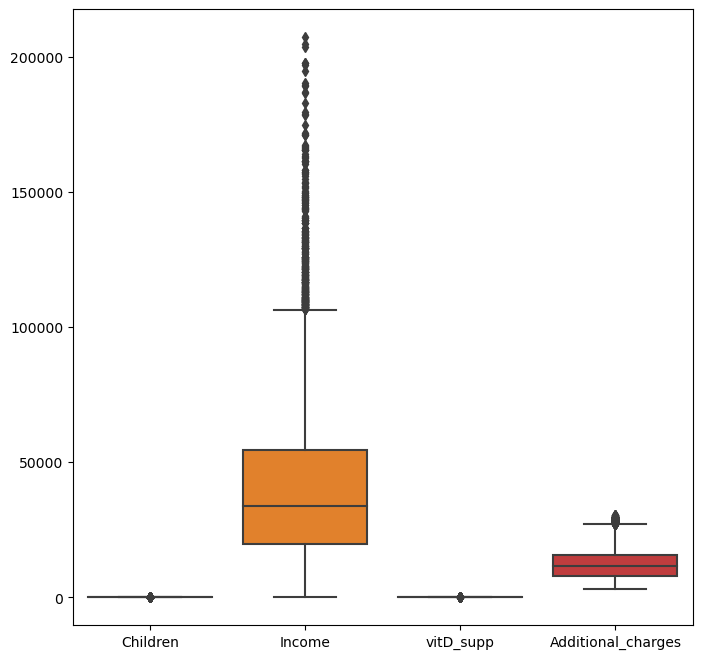

In [388]:
df_boxplot = df_new[['Children','Income','vitD_supp','Additional_charges']]
plt.subplots(figsize=(8,8))
sns.boxplot(data = df_boxplot)

In [389]:
Q3 = df_new['Children'].quantile(0.75) 
Q1 = df_new['Children'].quantile(0.25)
median = df_new['Children'].quantile(0.5)
IQR = Q3-Q1
upper = Q3 + (1.5*IQR)
lower = Q1 -(1.5*IQR)
df_new['Children'] = np.where(df_new['Children']>upper, upper, np.where(df_new['Children']<lower, lower, df_new['Children']))

In [390]:
Q3 = df_new['Income'].quantile(0.75) 
Q1 = df_new['Income'].quantile(0.25)
median = df_new['Income'].quantile(0.5)
IQR = Q3-Q1
upper = Q3 + (1.5*IQR)
lower = Q1 -(1.5*IQR)
df_new['Income'] = np.where(df_new['Income']>upper, upper, np.where(df_new['Income']<lower, lower, df_new['Income']))

In [391]:
Q3 = df_new['vitD_supp'].quantile(0.75) 
Q1 = df_new['vitD_supp'].quantile(0.25)
median = df_new['vitD_supp'].quantile(0.5)
IQR = Q3-Q1
upper = Q3 + (1.5*IQR)
lower = Q1 -(1.5*IQR)
df_new['vitD_supp'] = np.where(df_new['vitD_supp']>upper, upper, np.where(df_new['vitD_supp']<lower, lower, df_new['vitD_supp']))

In [392]:
Q3 = df_new['Additional_charges'].quantile(0.75) 
Q1 = df_new['Additional_charges'].quantile(0.25)
median = df_new['Additional_charges'].quantile(0.5)
IQR = Q3-Q1
upper = Q3 + (1.5*IQR)
lower = Q1 -(1.5*IQR)
df_new['Additional_charges'] = np.where(df_new['Additional_charges']>upper, upper, np.where(df_new['Additional_charges']<lower, lower, df_new['Additional_charges']))

<AxesSubplot:>

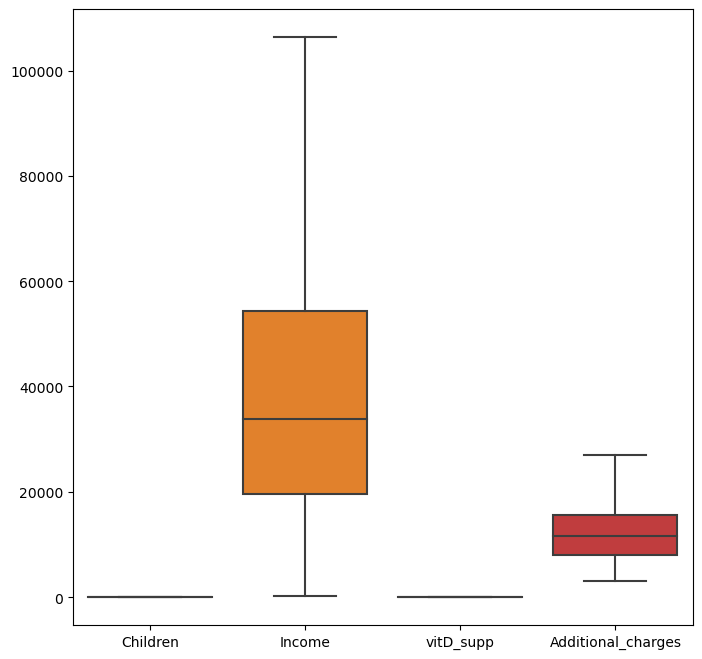

In [393]:
df_boxplot = df_new[['Children','Income','vitD_supp','Additional_charges']]
plt.subplots(figsize=(8,8))
sns.boxplot(data = df_boxplot)

array([[<AxesSubplot:title={'center':'Children'}>,
        <AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'Income'}>,
        <AxesSubplot:title={'center':'ReAdmis'}>,
        <AxesSubplot:title={'center':'VitD_levels'}>],
       [<AxesSubplot:title={'center':'Doc_visits'}>,
        <AxesSubplot:title={'center':'Full_meals_eaten'}>,
        <AxesSubplot:title={'center':'vitD_supp'}>,
        <AxesSubplot:title={'center':'Soft_drink'}>,
        <AxesSubplot:title={'center':'HighBlood'}>],
       [<AxesSubplot:title={'center':'Stroke'}>,
        <AxesSubplot:title={'center':'Overweight'}>,
        <AxesSubplot:title={'center':'Arthritis'}>,
        <AxesSubplot:title={'center':'Diabetes'}>,
        <AxesSubplot:title={'center':'Hyperlipidemia'}>],
       [<AxesSubplot:title={'center':'BackPain'}>,
        <AxesSubplot:title={'center':'Anxiety'}>,
        <AxesSubplot:title={'center':'Allergic_rhinitis'}>,
        <AxesSubplot:title={'center':'Reflux_esophagiti

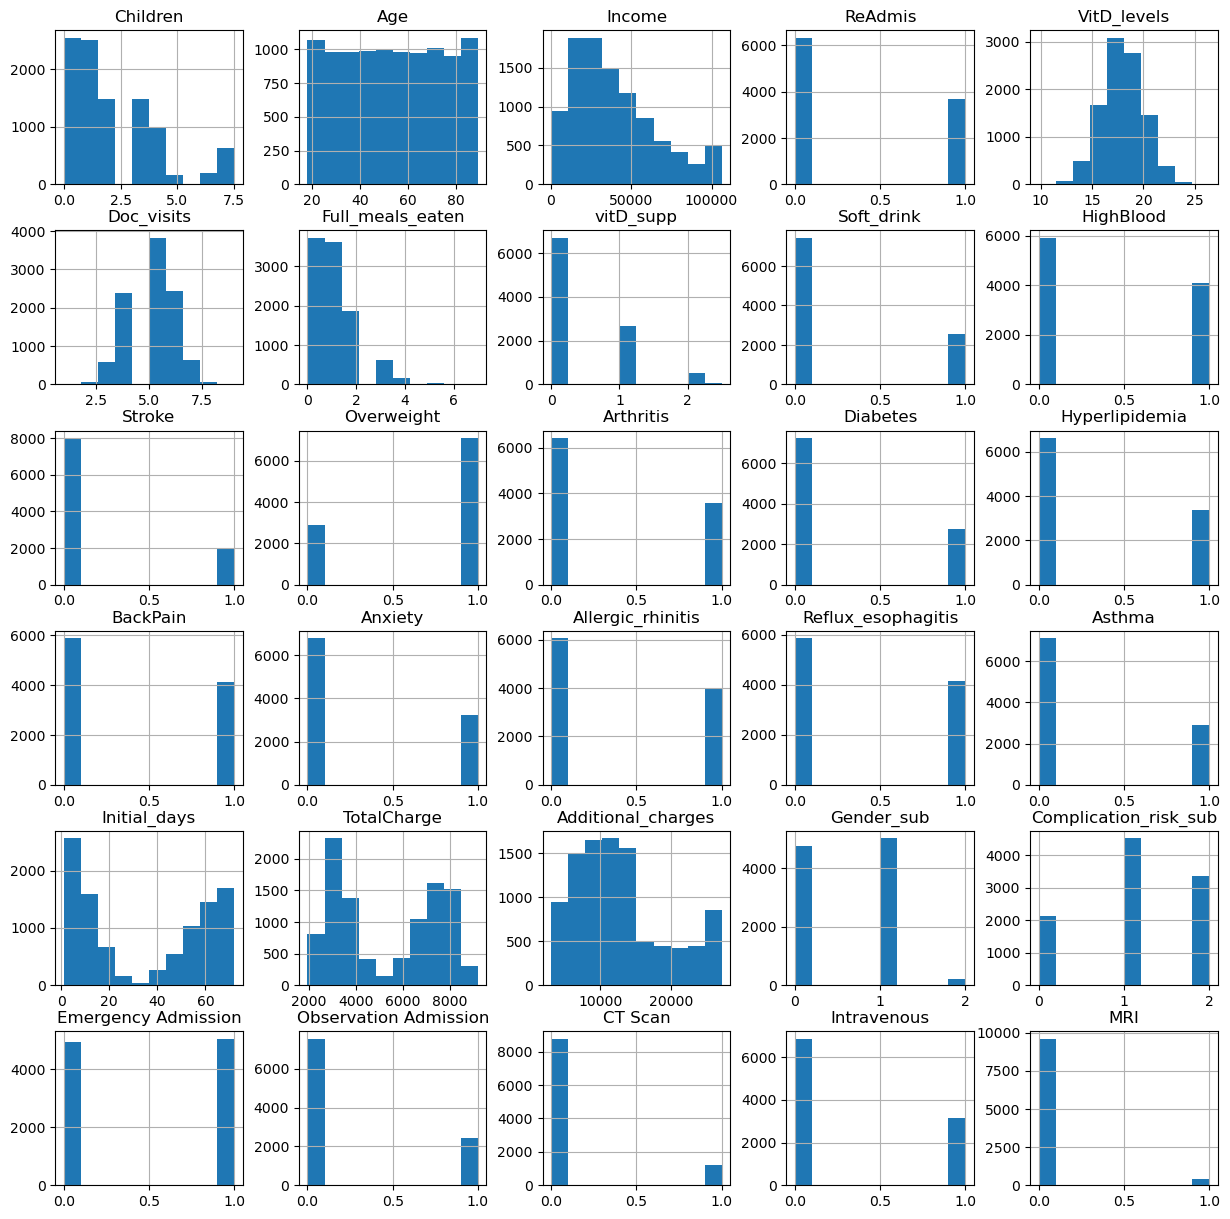

In [394]:
df_new.hist(figsize = (15,15))

In [395]:
df_new[['vitD_supp','Soft_drink','HighBlood','Stroke','Overweight','Arthritis','Diabetes','Hyperlipidemia','BackPain','Anxiety','Allergic_rhinitis','Reflux_esophagitis','Asthma']].describe()

,vitD_supp,Soft_drink,HighBlood,Stroke,Overweight,Arthritis,Diabetes,Hyperlipidemia,BackPain,Anxiety,Allergic_rhinitis,Reflux_esophagitis,Asthma
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000
mean,0.394700,0.257500,0.409000,0.199300,0.709400,0.357400,0.27380,0.337200,0.411400,0.321500,0.394100,0.413500,0.28930
std,0.611555,0.437279,0.491674,0.399494,0.454062,0.479258,0.44593,0.472777,0.492112,0.467076,0.488681,0.492486,0.45346
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
50%,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
75%,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000
max,2.500000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000


<AxesSubplot:xlabel='Children', ylabel='count'>

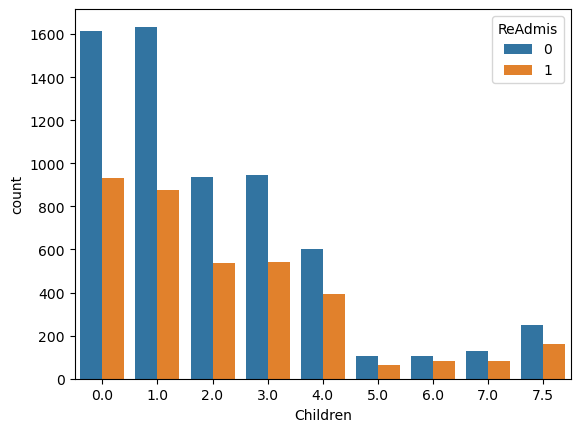

In [396]:
sns.countplot(data=df_new, x='Children',hue='ReAdmis')

<AxesSubplot:xlabel='ReAdmis', ylabel='vitD_supp'>

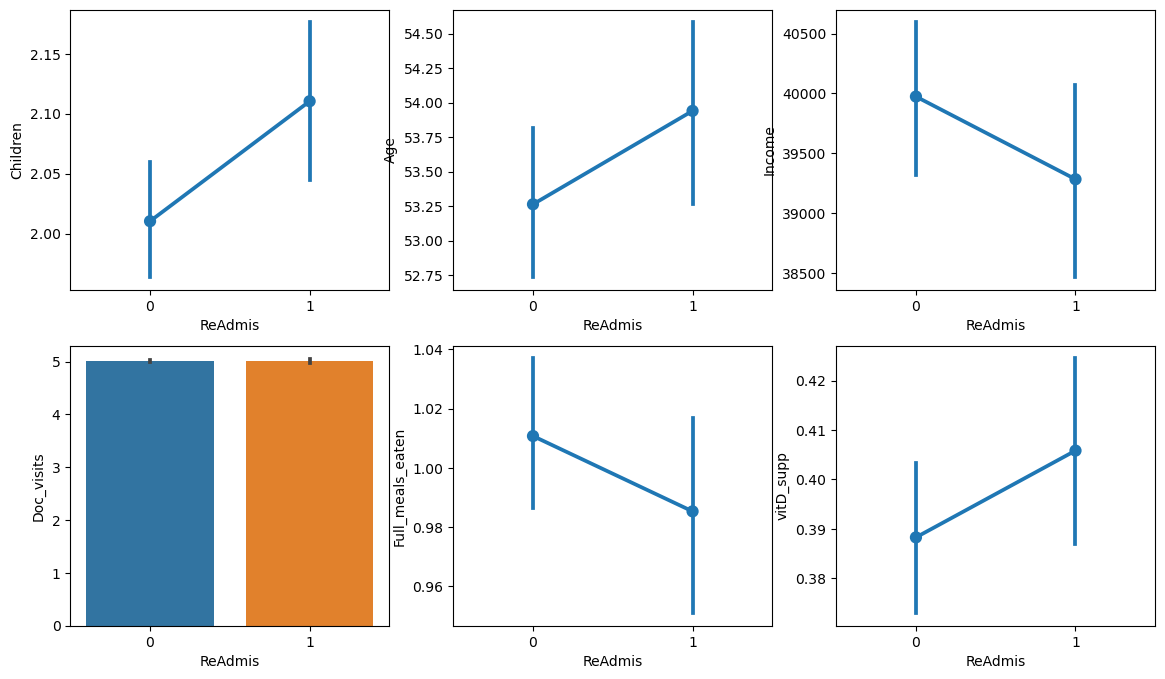

In [397]:
fig, axes=plt.subplots(2,3, figsize = (14,8))
sns.pointplot(ax=axes[0,0],y ='Children',x='ReAdmis',data = df_new)
sns.pointplot(ax=axes[0,1],y ='Age',x='ReAdmis', data = df_new)
sns.pointplot(ax=axes[0,2],y ='Income',x='ReAdmis', data = df_new)
sns.barplot(ax=axes[1,0],y ='Doc_visits',x='ReAdmis', data = df_new)
sns.pointplot(ax=axes[1,1],y ='Full_meals_eaten',x='ReAdmis', data = df_new)
sns.pointplot(ax=axes[1,2],y ='vitD_supp',x='ReAdmis', data = df_new)

<AxesSubplot:xlabel='Diabetes', ylabel='count'>

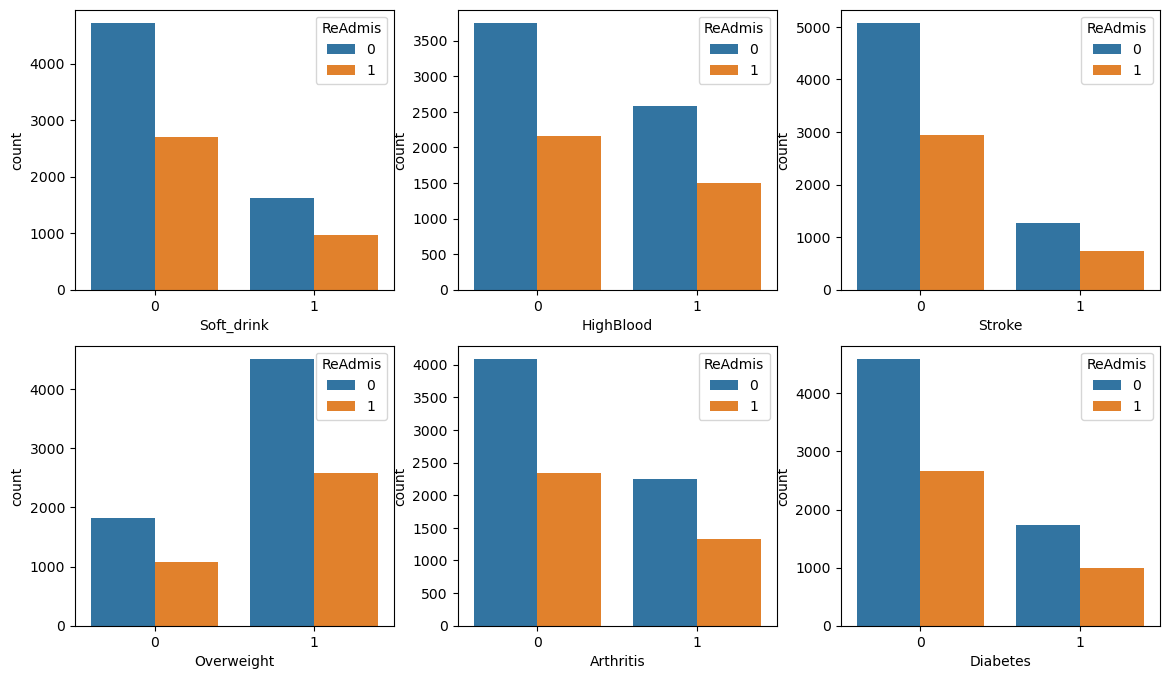

In [398]:
fig, axes=plt.subplots(2,3, figsize = (14,8))
sns.countplot(ax=axes[0,0],x ='Soft_drink',hue='ReAdmis',data = df_new)
sns.countplot(ax=axes[0,1],x ='HighBlood',hue='ReAdmis', data = df_new)
sns.countplot(ax=axes[0,2],x ='Stroke',hue='ReAdmis', data = df_new)
sns.countplot(ax=axes[1,0],x ='Overweight',hue='ReAdmis', data = df_new)
sns.countplot(ax=axes[1,1],x ='Arthritis',hue='ReAdmis', data = df_new)
sns.countplot(ax=axes[1,2],x ='Diabetes',hue='ReAdmis', data = df_new)

<AxesSubplot:xlabel='Asthma', ylabel='count'>

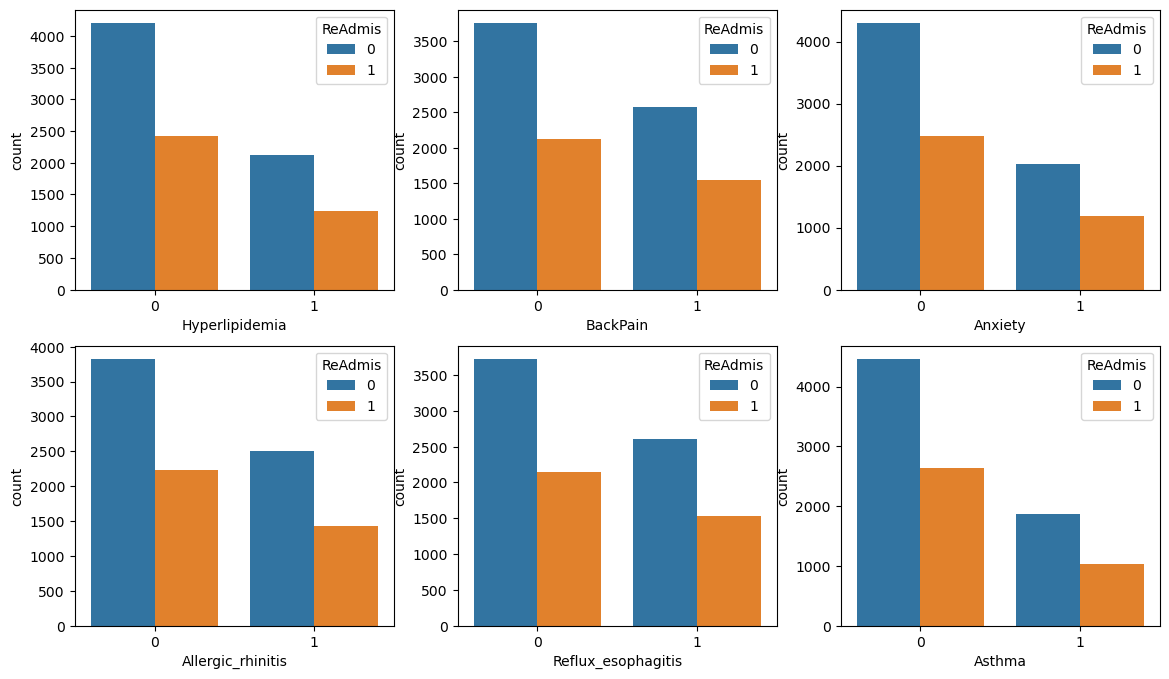

In [399]:
fig, axes=plt.subplots(2,3, figsize = (14,8))
sns.countplot(ax=axes[0,0],x ='Hyperlipidemia',hue='ReAdmis',data = df_new)
sns.countplot(ax=axes[0,1],x ='BackPain',hue='ReAdmis', data = df_new)
sns.countplot(ax=axes[0,2],x ='Anxiety',hue='ReAdmis', data = df_new)
sns.countplot(ax=axes[1,0],x ='Allergic_rhinitis',hue='ReAdmis', data = df_new)
sns.countplot(ax=axes[1,1],x ='Reflux_esophagitis',hue='ReAdmis', data = df_new)
sns.countplot(ax=axes[1,2],x ='Asthma',hue='ReAdmis', data = df_new)

In [400]:
df_new.to_csv('LogisticRegression.csv')

,Children,Age,Income,VitD_levels,Doc_visits,Full_meals_eaten,vitD_supp,Soft_drink,HighBlood,Stroke,Overweight,Arthritis,Diabetes,Hyperlipidemia,BackPain,Anxiety,Allergic_rhinitis,Reflux_esophagitis,Asthma,Initial_days,TotalCharge,Additional_charges,Gender_sub,Complication_risk_sub,Emergency Admission,Observation Admission,CT Scan,Intravenous,MRI
Children,1.000000,0.009602,0.005770,0.009300,-0.002079,0.002359,-0.005869,0.009076,0.001523,0.003512,-0.013822,0.008540,0.020473,-0.003538,-0.009349,0.007474,-0.018402,0.003578,0.002563,0.021826,0.023275,0.012846,0.003158,0.003130,0.009437,-0.006323,0.001116,0.012887,-0.006467
Age,0.009602,1.000000,-0.011662,0.010315,0.006898,0.008555,0.009083,-0.001337,0.007147,0.012035,-0.008292,0.007110,0.003694,0.003736,0.021081,0.006130,0.012092,-0.019609,0.009229,0.016264,0.016876,0.717294,0.015970,0.002887,-0.004538,-0.008336,0.009506,0.004142,0.008529
Income,0.005770,-0.011662,1.000000,-0.015521,0.013590,-0.013689,0.001325,0.003148,-0.000477,0.002818,-0.019946,-0.003653,-0.009384,0.005767,0.009144,0.001469,-0.004572,0.018143,0.010278,-0.012648,-0.014605,-0.009576,-0.002048,-0.000795,-0.024250,0.023586,-0.007695,0.006571,-0.004336
VitD_levels,0.009300,0.010315,-0.015521,1.000000,0.010210,0.023223,-0.008127,0.004172,0.005660,0.006721,0.009689,0.000075,-0.025834,-0.011870,-0.009080,0.007875,-0.005035,-0.014419,0.004937,-0.003642,-0.001403,0.008116,0.014499,0.003787,0.027322,-0.013690,0.008048,-0.001984,-0.012840
Doc_visits,-0.002079,0.006898,0.013590,0.010210,1.000000,-0.002767,0.006231,0.011282,0.008967,-0.002230,0.011890,-0.000719,0.012781,-0.026730,0.008514,-0.001684,0.002920,-0.005330,-0.017989,-0.006754,-0.005043,0.008105,0.005596,0.012306,0.003686,0.015658,0.014600,-0.008700,-0.012822
Full_meals_eaten,0.002359,0.008555,-0.013689,0.023223,-0.002767,1.000000,-0.020038,0.020962,0.014784,0.002784,-0.008287,0.011591,0.009603,0.000688,-0.015676,0.008602,0.015120,-0.000562,0.012459,-0.017267,-0.014306,0.019437,-0.015015,0.015798,0.006333,0.004527,-0.002939,0.016177,-0.018954
vitD_supp,-0.005869,0.009083,0.001325,-0.008127,0.006231,-0.020038,1.000000,-0.014530,0.006545,0.004037,-0.005943,-0.010973,-0.015655,0.013169,-0.003920,0.000889,0.008696,-0.006171,-0.022672,0.017683,0.018726,0.010062,-0.007289,0.011721,-0.002349,-0.020567,-0.000503,0.010963,0.011986
Soft_drink,0.009076,-0.001337,0.003148,0.004172,0.011282,0.020962,-0.014530,1.000000,-0.006129,0.001604,-0.004888,-0.007304,0.016907,0.016791,0.017496,0.016226,-0.015354,-0.002676,0.010114,0.002432,0.005463,-0.002437,0.006639,0.001410,0.021980,-0.023053,-0.006583,0.003958,0.012141
HighBlood,0.001523,0.007147,-0.000477,0.005660,0.008967,0.014784,0.006545,-0.006129,1.000000,0.007568,0.026231,0.007314,-0.005858,-0.009529,0.003048,0.008303,0.011709,0.001150,0.006174,-0.006333,0.019910,0.656904,-0.000156,0.021368,-0.001440,0.006006,0.011772,-0.008408,0.001681
Stroke,0.003512,0.012035,0.002818,0.006721,-0.002230,0.002784,0.004037,0.001604,0.007568,1.000000,-0.001011,-0.018438,0.005792,-0.014847,0.003602,-0.013801,-0.004837,-0.000054,0.002443,-0.002043,-0.003694,0.034364,0.005390,0.001119,-0.009743,0.005543,0.013635,-0.019871,-0.003580


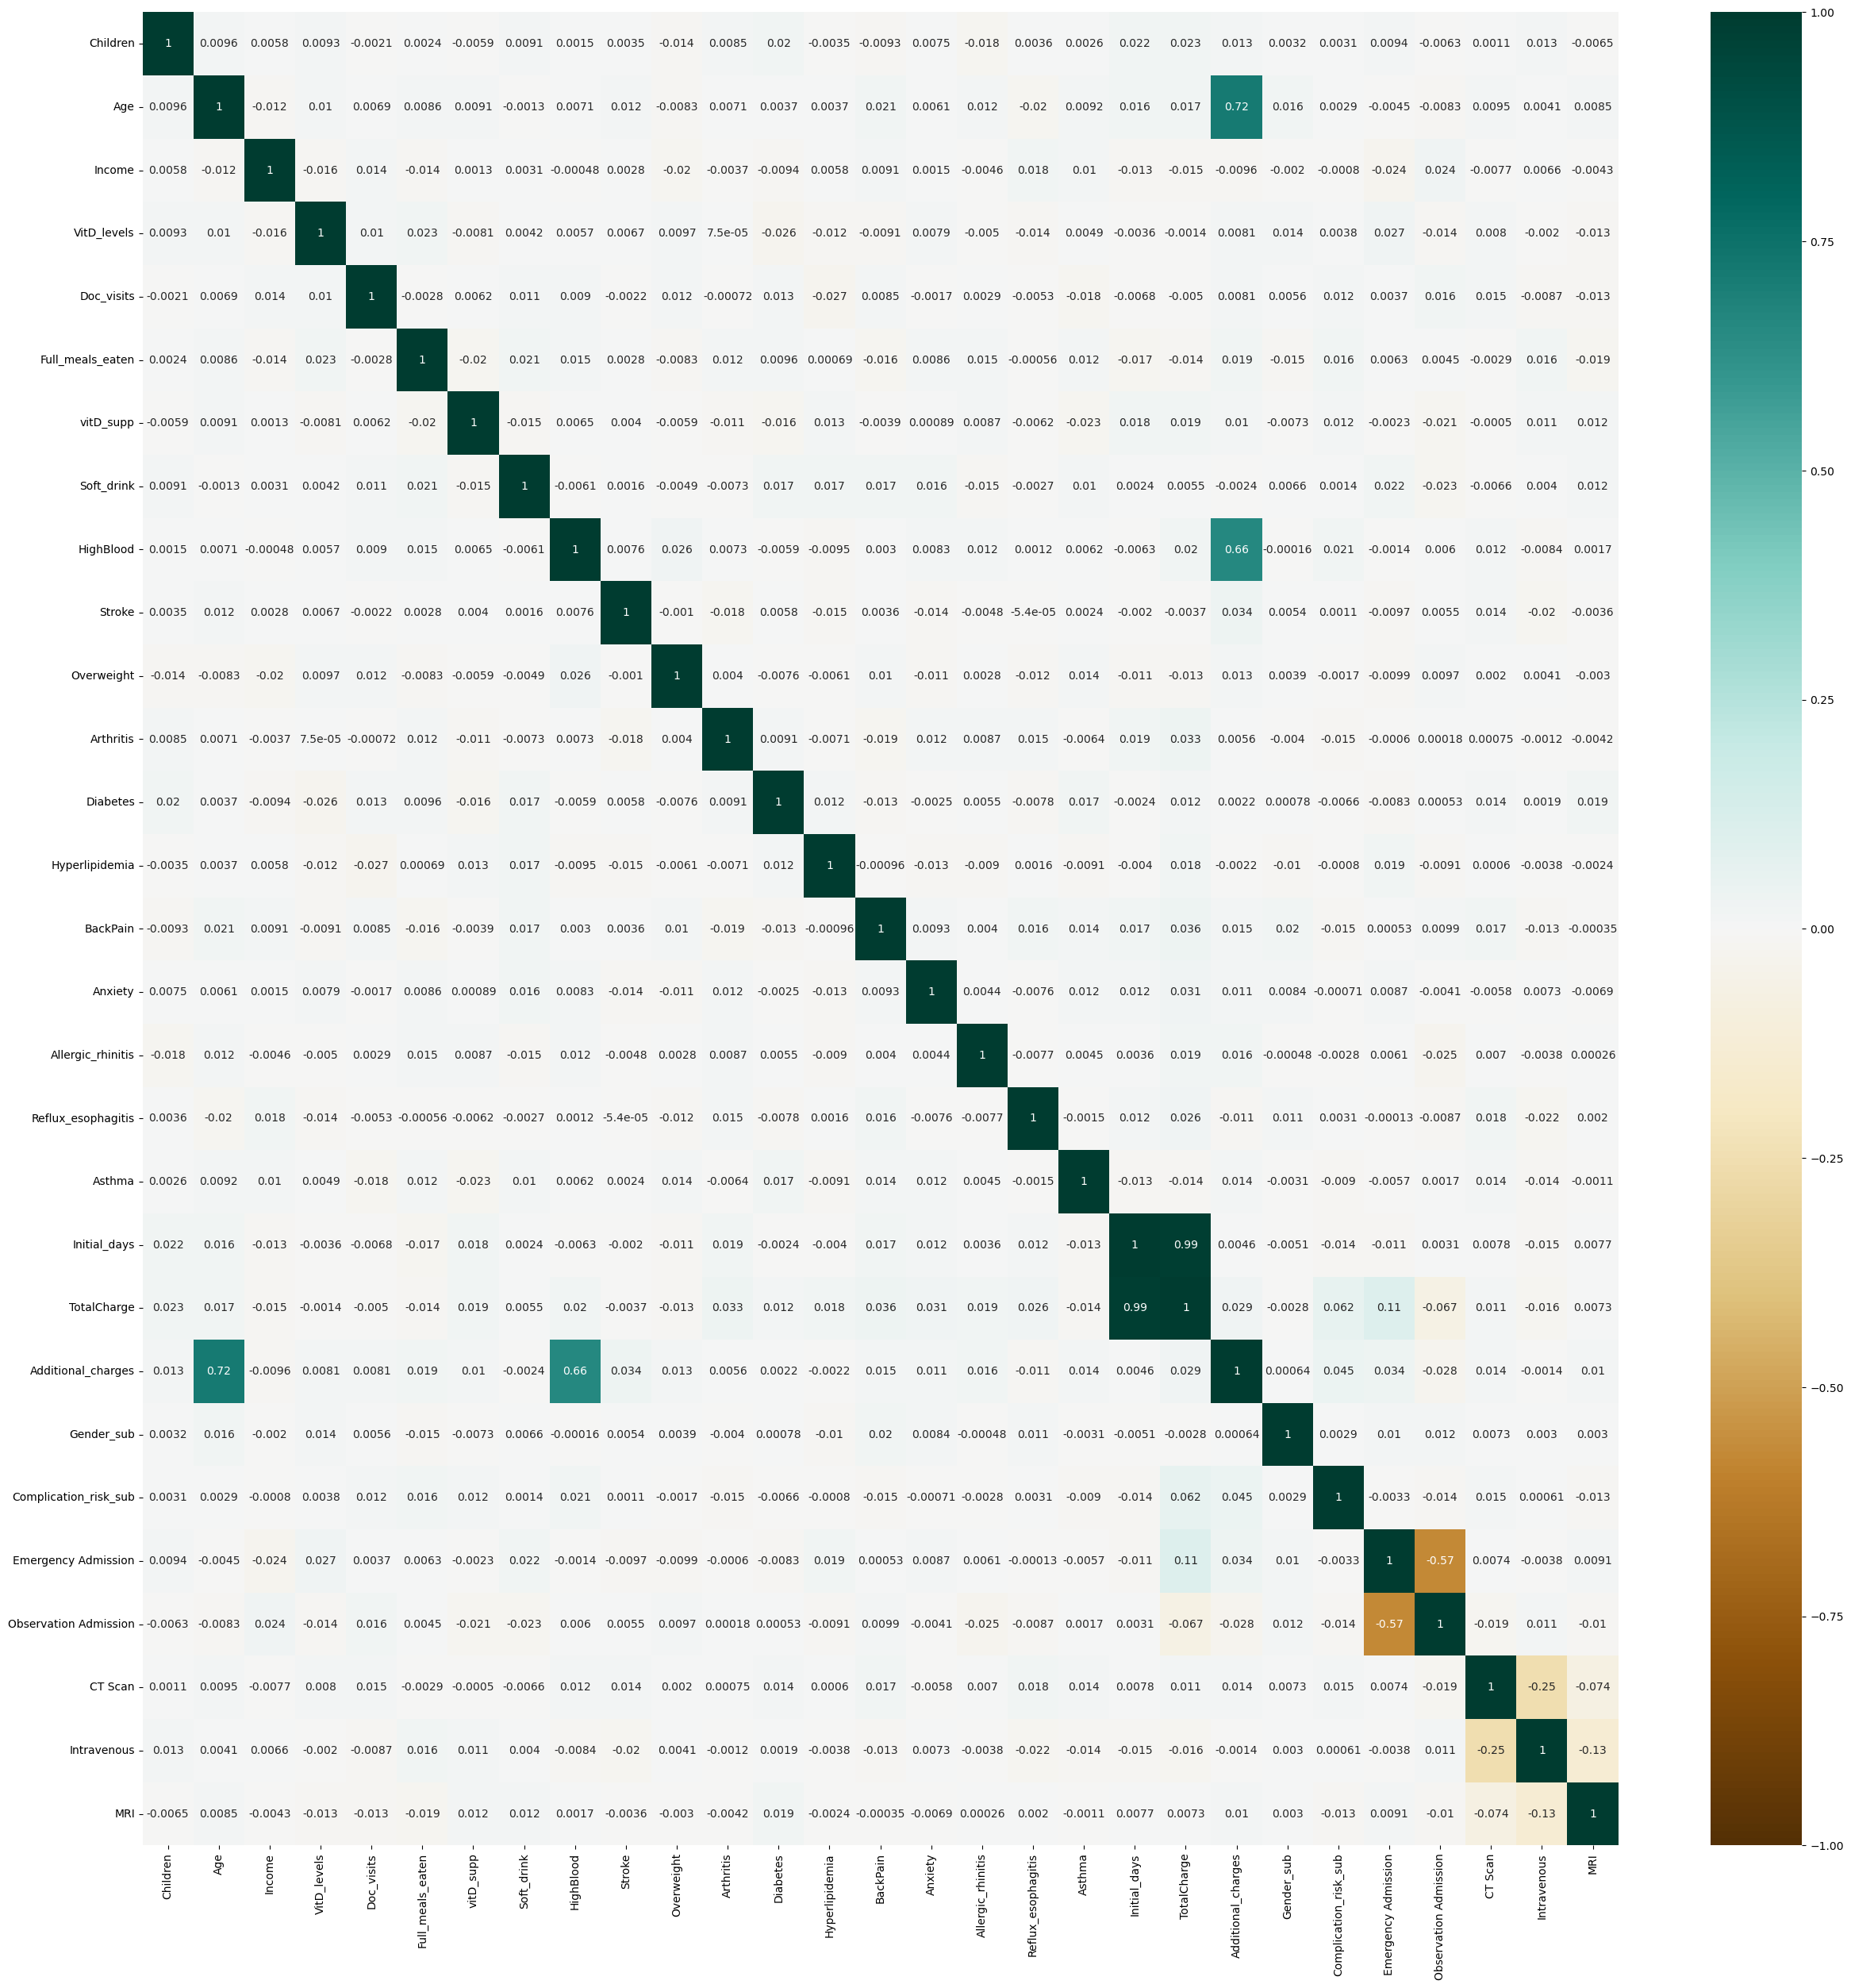

In [401]:
#create heatmap and correlation check
df_heatmap = df_new.drop(['ReAdmis'],axis=1)
plt.subplots(figsize=(30,30))
c = df_heatmap.corr()
sns.heatmap(c,cmap = 'BrBG',annot=True, vmin = -1, vmax =1)
c

In [402]:
#VIF check
vif_data = pd.DataFrame()
vif_data["feature"] = df_heatmap.columns
# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(df_heatmap.values, i)
                          for i in range(len(df_heatmap.columns))]
print(vif_data)

                  feature         VIF
0                Children    2.037169
1                     Age   74.338798
2                  Income    3.322295
3             VitD_levels   65.566828
4              Doc_visits   22.935443
5        Full_meals_eaten    1.992980
6               vitD_supp    1.421207
7              Soft_drink    1.350439
8               HighBlood   14.447279
9                  Stroke    1.259587
10             Overweight    3.424930
11              Arthritis    1.637392
12               Diabetes    1.456873
13         Hyperlipidemia    1.643411
14               BackPain    1.842206
15                Anxiety    1.571943
16      Allergic_rhinitis    1.734805
17     Reflux_esophagitis    1.792808
18                 Asthma    1.409631
19           Initial_days  386.688934
20            TotalCharge  985.884186
21     Additional_charges   86.212377
22             Gender_sub    2.027780
23  Complication_risk_sub    6.941116
24    Emergency Admission    7.826200
25  Observat

In [403]:
#Drop TotalCharge
df_heatmap = df_heatmap.drop(['TotalCharge'],axis=1)
vif_data = pd.DataFrame()
vif_data["feature"] = df_heatmap.columns
# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(df_heatmap.values, i)
                          for i in range(len(df_heatmap.columns))]
print(vif_data)

                  feature        VIF
0                Children   2.028004
1                     Age  72.411293
2                  Income   3.269302
3             VitD_levels  33.573024
4              Doc_visits  20.216783
5        Full_meals_eaten   1.986298
6               vitD_supp   1.416541
7              Soft_drink   1.349388
8               HighBlood  13.772255
9                  Stroke   1.257413
10             Overweight   3.390558
11              Arthritis   1.554643
12               Diabetes   1.375811
13         Hyperlipidemia   1.502649
14               BackPain   1.698434
15                Anxiety   1.472899
16      Allergic_rhinitis   1.645575
17     Reflux_esophagitis   1.696258
18                 Asthma   1.406763
19           Initial_days   2.687466
20     Additional_charges  85.185801
21             Gender_sub   2.021668
22  Complication_risk_sub   3.352115
23    Emergency Admission   3.013573
24  Observation Admission   1.956175
25                CT Scan   1.233824
2

In [404]:
#Drop Additional_charges
df_heatmap = df_heatmap.drop(['Additional_charges'],axis=1)
vif_data = pd.DataFrame()
vif_data["feature"] = df_heatmap.columns
# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(df_heatmap.values, i)
                          for i in range(len(df_heatmap.columns))]
print(vif_data)

                  feature        VIF
0                Children   2.027911
1                     Age   7.397587
2                  Income   3.267587
3             VitD_levels  32.087337
4              Doc_visits  20.085501
5        Full_meals_eaten   1.986296
6               vitD_supp   1.416269
7              Soft_drink   1.349388
8               HighBlood   1.690860
9                  Stroke   1.249129
10             Overweight   3.390078
11              Arthritis   1.553726
12               Diabetes   1.375790
13         Hyperlipidemia   1.502501
14               BackPain   1.697935
15                Anxiety   1.472899
16      Allergic_rhinitis   1.645347
17     Reflux_esophagitis   1.696200
18                 Asthma   1.406730
19           Initial_days   2.685573
20             Gender_sub   2.015355
21  Complication_risk_sub   3.317999
22    Emergency Admission   2.983254
23  Observation Admission   1.953489
24                CT Scan   1.233700
25            Intravenous   1.588245
2

In [405]:
#Drop vitD_level
df_heatmap = df_heatmap.drop(['VitD_levels'],axis=1)
vif_data = pd.DataFrame()
vif_data["feature"] = df_heatmap.columns
# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(df_heatmap.values, i)
                          for i in range(len(df_heatmap.columns))]
print(vif_data)

                  feature        VIF
0                Children   2.003729
1                     Age   6.805330
2                  Income   3.185933
3              Doc_visits  13.701297
4        Full_meals_eaten   1.958205
5               vitD_supp   1.410439
6              Soft_drink   1.345579
7               HighBlood   1.681398
8                  Stroke   1.244685
9              Overweight   3.281362
10              Arthritis   1.544266
11               Diabetes   1.373362
12         Hyperlipidemia   1.491706
13               BackPain   1.690070
14                Anxiety   1.465040
15      Allergic_rhinitis   1.634242
16     Reflux_esophagitis   1.683034
17                 Asthma   1.398351
18           Initial_days   2.629552
19             Gender_sub   1.992922
20  Complication_risk_sub   3.225941
21    Emergency Admission   2.873991
22  Observation Admission   1.910170
23                CT Scan   1.230306
24            Intravenous   1.575242
25                    MRI   1.070593


In [406]:
#Drop Doc_visits
df_heatmap = df_heatmap.drop(['Doc_visits'],axis=1)
vif_data = pd.DataFrame()
vif_data["feature"] = df_heatmap.columns
# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(df_heatmap.values, i)
                          for i in range(len(df_heatmap.columns))]
print(vif_data)

                  feature       VIF
0                Children  1.977917
1                     Age  6.048221
2                  Income  3.046659
3        Full_meals_eaten  1.932786
4               vitD_supp  1.399751
5              Soft_drink  1.338324
6               HighBlood  1.667340
7                  Stroke  1.240524
8              Overweight  3.132017
9               Arthritis  1.532600
10               Diabetes  1.363558
11         Hyperlipidemia  1.485094
12               BackPain  1.675172
13                Anxiety  1.456967
14      Allergic_rhinitis  1.617753
15     Reflux_esophagitis  1.665516
16                 Asthma  1.393687
17           Initial_days  2.565315
18             Gender_sub  1.966798
19  Complication_risk_sub  3.092092
20    Emergency Admission  2.729537
21  Observation Admission  1.835594
22                CT Scan  1.224393
23            Intravenous  1.561723
24                    MRI  1.069468


In [407]:
#split data into training and testing
y=df_new['ReAdmis']
x=df_new.drop(['ReAdmis','TotalCharge','Additional_charges','VitD_levels','Doc_visits'],axis=1)
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size= 0.2)
logreg = LogisticRegression(max_iter = 10000)
logreg.fit(x_train, y_train)
y_pred = logreg.predict(x_test)

[[1079  167]
 [  70  684]]


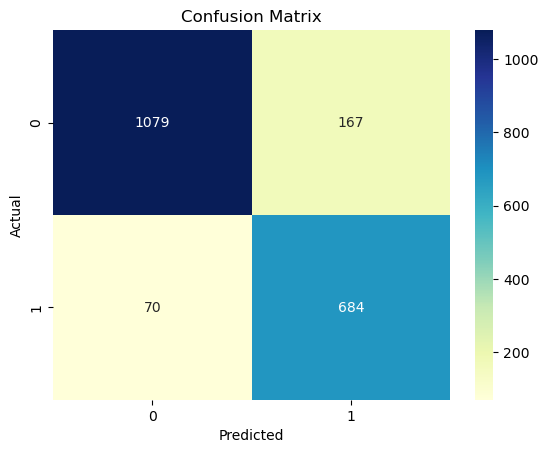

In [408]:
#create confusion matrix
ConfusionMatrix = confusion_matrix(y_test,y_pred)
print(ConfusionMatrix)
sns.heatmap(ConfusionMatrix, annot=True, fmt='d', cmap='YlGnBu')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [409]:
#Accuracy from confusion matrix
TP = ConfusionMatrix[1,1]
TN = ConfusionMatrix[0,0]
Total = len(y_test)
(TN+TP)/Total

0.8815

In [410]:
x_train=sm.add_constant(x_train)
model = sm.Logit(y_train,x_train).fit()
print(model.summary())
p_values = model.pvalues
print(p_values)

Optimization terminated successfully.
         Current function value: 0.035652
         Iterations 14
                           Logit Regression Results                           
Dep. Variable:                ReAdmis   No. Observations:                 8000
Model:                          Logit   Df Residuals:                     7974
Method:                           MLE   Df Model:                           25
Date:                Tue, 24 Jan 2023   Pseudo R-squ.:                  0.9456
Time:                        21:01:53   Log-Likelihood:                -285.22
converged:                       True   LL-Null:                       -5247.2
Covariance Type:            nonrobust   LLR p-value:                     0.000
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                   -78.2958      4.809    -16.280      0.000     -87.722     -68

In [411]:
max_p_value = max(p_values)
max_p_value_variable = p_values.idxmax()
if max_p_value > 0.05:
    x_train.drop(max_p_value_variable, axis=1, inplace=True)

In [412]:
x_train=sm.add_constant(x_train)
model = sm.Logit(y_train,x_train).fit()
print(model.summary())
p_values = model.pvalues

Optimization terminated successfully.
         Current function value: 0.035652
         Iterations 14
                           Logit Regression Results                           
Dep. Variable:                ReAdmis   No. Observations:                 8000
Model:                          Logit   Df Residuals:                     7975
Method:                           MLE   Df Model:                           24
Date:                Tue, 24 Jan 2023   Pseudo R-squ.:                  0.9456
Time:                        21:02:00   Log-Likelihood:                -285.22
converged:                       True   LL-Null:                       -5247.2
Covariance Type:            nonrobust   LLR p-value:                     0.000
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                   -78.2953      4.810    -16.278      0.000     -87.722     -68

In [413]:
max_p_value = max(p_values)
max_p_value_variable = p_values.idxmax()
if max_p_value > 0.05:
    x_train.drop(max_p_value_variable, axis=1, inplace=True)
x_train=sm.add_constant(x_train)
model = sm.Logit(y_train,x_train).fit()
print(model.summary())
p_values = model.pvalues

Optimization terminated successfully.
         Current function value: 0.035654
         Iterations 14
                           Logit Regression Results                           
Dep. Variable:                ReAdmis   No. Observations:                 8000
Model:                          Logit   Df Residuals:                     7976
Method:                           MLE   Df Model:                           23
Date:                Tue, 24 Jan 2023   Pseudo R-squ.:                  0.9456
Time:                        21:02:00   Log-Likelihood:                -285.23
converged:                       True   LL-Null:                       -5247.2
Covariance Type:            nonrobust   LLR p-value:                     0.000
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                   -78.2561      4.803    -16.293      0.000     -87.670     -68

In [414]:
max_p_value = max(p_values)
max_p_value_variable = p_values.idxmax()
if max_p_value > 0.05:
    x_train.drop(max_p_value_variable, axis=1, inplace=True)
x_train=sm.add_constant(x_train)
model = sm.Logit(y_train,x_train).fit()
print(model.summary())
p_values = model.pvalues

Optimization terminated successfully.
         Current function value: 0.035656
         Iterations 14
                           Logit Regression Results                           
Dep. Variable:                ReAdmis   No. Observations:                 8000
Model:                          Logit   Df Residuals:                     7977
Method:                           MLE   Df Model:                           22
Date:                Tue, 24 Jan 2023   Pseudo R-squ.:                  0.9456
Time:                        21:02:01   Log-Likelihood:                -285.25
converged:                       True   LL-Null:                       -5247.2
Covariance Type:            nonrobust   LLR p-value:                     0.000
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                   -78.1877      4.781    -16.353      0.000     -87.559     -68

In [415]:
max_p_value = max(p_values)
max_p_value_variable = p_values.idxmax()
if max_p_value > 0.05:
    x_train.drop(max_p_value_variable, axis=1, inplace=True)
x_train=sm.add_constant(x_train)
model = sm.Logit(y_train,x_train).fit()
print(model.summary())
p_values = model.pvalues

Optimization terminated successfully.
         Current function value: 0.035660
         Iterations 14
                           Logit Regression Results                           
Dep. Variable:                ReAdmis   No. Observations:                 8000
Model:                          Logit   Df Residuals:                     7978
Method:                           MLE   Df Model:                           21
Date:                Tue, 24 Jan 2023   Pseudo R-squ.:                  0.9456
Time:                        21:02:02   Log-Likelihood:                -285.28
converged:                       True   LL-Null:                       -5247.2
Covariance Type:            nonrobust   LLR p-value:                     0.000
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                   -78.1687      4.780    -16.352      0.000     -87.538     -68

In [416]:
max_p_value = max(p_values)
max_p_value_variable = p_values.idxmax()
if max_p_value > 0.05:
    x_train.drop(max_p_value_variable, axis=1, inplace=True)
x_train=sm.add_constant(x_train)
model = sm.Logit(y_train,x_train).fit()
print(model.summary())
p_values = model.pvalues

Optimization terminated successfully.
         Current function value: 0.035664
         Iterations 14
                           Logit Regression Results                           
Dep. Variable:                ReAdmis   No. Observations:                 8000
Model:                          Logit   Df Residuals:                     7979
Method:                           MLE   Df Model:                           20
Date:                Tue, 24 Jan 2023   Pseudo R-squ.:                  0.9456
Time:                        21:02:02   Log-Likelihood:                -285.31
converged:                       True   LL-Null:                       -5247.2
Covariance Type:            nonrobust   LLR p-value:                     0.000
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                   -78.2573      4.772    -16.398      0.000     -87.611     -68

In [417]:
max_p_value = max(p_values)
max_p_value_variable = p_values.idxmax()
if max_p_value > 0.05:
    x_train.drop(max_p_value_variable, axis=1, inplace=True)
x_train=sm.add_constant(x_train)
model = sm.Logit(y_train,x_train).fit()
print(model.summary())
p_values = model.pvalues

Optimization terminated successfully.
         Current function value: 0.035716
         Iterations 14
                           Logit Regression Results                           
Dep. Variable:                ReAdmis   No. Observations:                 8000
Model:                          Logit   Df Residuals:                     7980
Method:                           MLE   Df Model:                           19
Date:                Tue, 24 Jan 2023   Pseudo R-squ.:                  0.9455
Time:                        21:02:02   Log-Likelihood:                -285.73
converged:                       True   LL-Null:                       -5247.2
Covariance Type:            nonrobust   LLR p-value:                     0.000
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                   -78.2009      4.761    -16.427      0.000     -87.531     -68

In [418]:
max_p_value = max(p_values)
max_p_value_variable = p_values.idxmax()
if max_p_value > 0.05:
    x_train.drop(max_p_value_variable, axis=1, inplace=True)
x_train=sm.add_constant(x_train)
model = sm.Logit(y_train,x_train).fit()
print(model.summary())
p_values = model.pvalues

Optimization terminated successfully.
         Current function value: 0.035772
         Iterations 14
                           Logit Regression Results                           
Dep. Variable:                ReAdmis   No. Observations:                 8000
Model:                          Logit   Df Residuals:                     7981
Method:                           MLE   Df Model:                           18
Date:                Tue, 24 Jan 2023   Pseudo R-squ.:                  0.9455
Time:                        21:02:02   Log-Likelihood:                -286.18
converged:                       True   LL-Null:                       -5247.2
Covariance Type:            nonrobust   LLR p-value:                     0.000
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                   -78.0887      4.742    -16.468      0.000     -87.382     -68

In [419]:
max_p_value = max(p_values)
max_p_value_variable = p_values.idxmax()
if max_p_value > 0.05:
    x_train.drop(max_p_value_variable, axis=1, inplace=True)
x_train=sm.add_constant(x_train)
model = sm.Logit(y_train,x_train).fit()
print(model.summary())
p_values = model.pvalues

Optimization terminated successfully.
         Current function value: 0.035851
         Iterations 14
                           Logit Regression Results                           
Dep. Variable:                ReAdmis   No. Observations:                 8000
Model:                          Logit   Df Residuals:                     7982
Method:                           MLE   Df Model:                           17
Date:                Tue, 24 Jan 2023   Pseudo R-squ.:                  0.9453
Time:                        21:02:02   Log-Likelihood:                -286.81
converged:                       True   LL-Null:                       -5247.2
Covariance Type:            nonrobust   LLR p-value:                     0.000
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                   -78.0018      4.738    -16.464      0.000     -87.288     -68

In [420]:
max_p_value = max(p_values)
max_p_value_variable = p_values.idxmax()
if max_p_value > 0.05:
    x_train.drop(max_p_value_variable, axis=1, inplace=True)
x_train=sm.add_constant(x_train)
model = sm.Logit(y_train,x_train).fit()
print(model.summary())
p_values = model.pvalues

Optimization terminated successfully.
         Current function value: 0.035959
         Iterations 14
                           Logit Regression Results                           
Dep. Variable:                ReAdmis   No. Observations:                 8000
Model:                          Logit   Df Residuals:                     7983
Method:                           MLE   Df Model:                           16
Date:                Tue, 24 Jan 2023   Pseudo R-squ.:                  0.9452
Time:                        21:02:03   Log-Likelihood:                -287.67
converged:                       True   LL-Null:                       -5247.2
Covariance Type:            nonrobust   LLR p-value:                     0.000
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                   -77.7280      4.720    -16.467      0.000     -86.979     -68

In [421]:
max_p_value = max(p_values)
max_p_value_variable = p_values.idxmax()
if max_p_value > 0.05:
    x_train.drop(max_p_value_variable, axis=1, inplace=True)
x_train=sm.add_constant(x_train)
model = sm.Logit(y_train,x_train).fit()
print(model.summary())
p_values = model.pvalues

Optimization terminated successfully.
         Current function value: 0.036082
         Iterations 14
                           Logit Regression Results                           
Dep. Variable:                ReAdmis   No. Observations:                 8000
Model:                          Logit   Df Residuals:                     7984
Method:                           MLE   Df Model:                           15
Date:                Tue, 24 Jan 2023   Pseudo R-squ.:                  0.9450
Time:                        21:02:03   Log-Likelihood:                -288.65
converged:                       True   LL-Null:                       -5247.2
Covariance Type:            nonrobust   LLR p-value:                     0.000
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                   -77.2754      4.679    -16.516      0.000     -86.446     -68

In [422]:
max_p_value = max(p_values)
max_p_value_variable = p_values.idxmax()
if max_p_value > 0.05:
    x_train.drop(max_p_value_variable, axis=1, inplace=True)
x_train=sm.add_constant(x_train)
model = sm.Logit(y_train,x_train).fit()
print(model.summary())
p_values = model.pvalues

Optimization terminated successfully.
         Current function value: 0.036214
         Iterations 14
                           Logit Regression Results                           
Dep. Variable:                ReAdmis   No. Observations:                 8000
Model:                          Logit   Df Residuals:                     7985
Method:                           MLE   Df Model:                           14
Date:                Tue, 24 Jan 2023   Pseudo R-squ.:                  0.9448
Time:                        21:02:03   Log-Likelihood:                -289.71
converged:                       True   LL-Null:                       -5247.2
Covariance Type:            nonrobust   LLR p-value:                     0.000
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                   -77.1077      4.654    -16.567      0.000     -86.230     -67

In [424]:
regressor = LogisticRegression(max_iter = 10000)
regressor.fit(x_train, y_train)

LogisticRegression(max_iter=10000)

[[1281   11]
 [  15  693]]


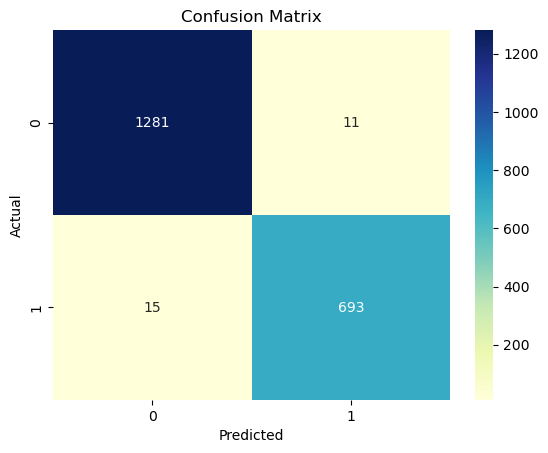

In [425]:
y=df_new['ReAdmis']
x=df_new[['HighBlood','Stroke','Arthritis','Allergic_rhinitis','Anxiety','Reflux_esophagitis','Asthma','Initial_days','Complication_risk_sub','Emergency Admission','Observation Admission','CT Scan','MRI']]
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size= 0.2)
logreg = LogisticRegression(max_iter = 10000)
logreg.fit(x_train, y_train)
y_pred = logreg.predict(x_test)
ConfusionMatrix = confusion_matrix(y_test,y_pred)
print(ConfusionMatrix)
sns.heatmap(ConfusionMatrix, annot=True, fmt='d', cmap='YlGnBu')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [426]:
#Accuracy from confusion matrix
TP = ConfusionMatrix[1,1]
TN = ConfusionMatrix[0,0]
Total = len(y_test)
(TN+TP)/Total

0.987

In [427]:
print(model.summary())

                           Logit Regression Results                           
Dep. Variable:                ReAdmis   No. Observations:                 8000
Model:                          Logit   Df Residuals:                     7985
Method:                           MLE   Df Model:                           14
Date:                Tue, 24 Jan 2023   Pseudo R-squ.:                  0.9448
Time:                        21:02:06   Log-Likelihood:                -289.71
converged:                       True   LL-Null:                       -5247.2
Covariance Type:            nonrobust   LLR p-value:                     0.000
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                   -77.1077      4.654    -16.567      0.000     -86.230     -67.985
Children                  0.1044      0.051      2.047      0.041       0.004       0.204
HighBloo

In [433]:
params = model.params
conf = model.conf_int()
conf['Odds Ratio'] = params
conf.columns = ['5%', '95%', 'Odds Ratio']
OR = np.exp(conf)
print(OR.round(4))

                           5%      95%  Odds Ratio
const                  0.0000   0.0000      0.0000
Children               1.0044   1.2267      1.1100
HighBlood              1.3111   3.1370      2.0280
Stroke                 2.8434   8.6190      4.9504
Arthritis              0.1655   0.4170      0.2627
Anxiety                0.2344   0.5914      0.3723
Allergic_rhinitis      0.4134   0.9835      0.6376
Reflux_esophagitis     0.3765   0.9066      0.5843
Asthma                 0.1826   0.4859      0.2978
Initial_days           3.3934   4.7080      3.9970
Complication_risk_sub  1.7132   3.1224      2.3128
Emergency Admission    6.4930  20.4383     11.5198
Observation Admission  1.1700   3.6678      2.0715
CT Scan                2.0589   8.7989      4.2563
MRI                    3.2894  25.5399      9.1658
